### 感知机
- 目的：旨在求出将训练数据进行线性划分的分离超平面。
- 假设空间：定义在特征空间中的所有线性分类模型，即函数集合$\{f|f(x)=w\cdot x + b\}$

假设特征空间是$X\in \mathbb{R}^n$，输出空间时$y=\{+1, -1\}$，由输入空间到输出空间的函数为：
$$f(x)=sign(w\cdot x + b)$$

#### 线性可分数据集
> 存在某个超平面$w\cdot x + b = 0$，能将数据集的正实例点和负实例点完全正确地划分到超平面的两侧，即对所有$y_i=+1$的实例$i$，有$w\cdot x_i + b > 0$；对所有$y_i=-1$的实例$i$，有$w\cdot x_i + b < 0$。

- 特征空间中任一点$x_0$到超平面$S$的距离为：
$$\frac{1}{||w||}|w\cdot x_0 +b|$$
- 对于误分类点来说：$-y_i(w\cdot x_i + b) > 0$，因此，误分类点$x_i$到超平面$S$的距离为：
$$-\frac{1}{||w||}y_i(w\cdot x_i +b)$$
- 假设误分类点集合为$M$，则所有误分类点到超平面$S$的总距离为：
$$-\frac{1}{||w||}\sum_{x_i\in M}y_i(w\cdot x_i +b)$$
- 不考虑$\frac{1}{||w||}$，得到感知机学习的损失函数为：
$$L(w,b)=-\sum_{x_i\in M}y_i(w\cdot x_i +b)$$
- 感知器学习策略：即在假设空间中选取使损失函数最小的模型参数$w,b$。

#### 原始形式
- **随机梯度下降法**：
- 任意选取一个超平面$w_0,b_0$，然后用梯度下降法不断地极小化目标函数$L(w,b)$。极小化过程中不是一次使$M$中所有误分类点的梯度下降，而是一次随机选取一个误分类点使其梯度下降。
- 损失函数$L(w,b)$的梯度为：
$$\bigtriangledown _wL(w,b)=-\sum_{x_i\in M}y_ix_i$$
$$\bigtriangledown _bL(w,b)=-\sum_{x_i\in M}y_i$$
- 随机选取一个误分类点$(x_i,y_i)$，对$w,b$进行更新：
$$w\leftarrow w+\eta y_ix_i$$
$$b\leftarrow b+\eta y_i$$
- 其中$\eta(0<\eta\leq 1)$是步长，即学习率。通过迭代，可是损失函数$L(w,b)$不断减小，直到为0。

_____
1. 感知机学习算法由于采用不同的初值或选取不同的误分类点，解可以不同。
2. 当训练集线性不可分时，感知机学习算法不收敛，迭代结果会发生震荡。

#### 对偶形式
- 基本思想：将$w$和$b$表示为实例$x_i$和标记$y_i$的线性组合的形式，通过求解其系数而求得$w$和$b$。

假设初始值$w_0,b_0$均为0，对误分类点$(x_i,y_i)$通过：
$$w \leftarrow w + \eta y_ix_i$$
$$b \leftarrow b + \eta y_i$$
逐步逼近$w,b$。设修改$n$次，则$w_i,b_i$关于$(x_i,y_i)$的增量分别是$\alpha_i y_ix_i$和$\alpha_i y_i$，最后学习到的$w,b$可分别表示为：
$$w=\sum_{i=1}^{N}\alpha_i y_ix_i$$
$$b=\sum_{i=1}^{N}\alpha_i y_i$$
此处，$\alpha_i \geq 0, i=1,2,\cdots,N$，当$\eta =1$时，表示第$i$个实例点由于误分而进行更新的次数。实例点更新次数越多，意味着它距离分离超平面越近，也就越难正确分类。

感知机模型为$f(x)=sign(\sum_{j=1}^{N}\alpha_j y_ix_i\cdots+b)$，其中$\alpha=(\alpha_1,\alpha_2,\cdots,\alpha_N)^T$。
1. $\alpha \leftarrow 0, b \leftarrow 0$；
2. 在训练集中选取数据$(x_i,y_i)$；
3. 如果$y_i (\sum_{j=1}^{N}\alpha_j y_ix_i\cdots+b) \leq 0$：
$$\alpha_i \leftarrow \alpha_i + \eta$$
$$b \leftarrow b + \eta y_i$$
4. 转至2直到没有误分类数据。

____
- **Gram矩阵**：$n$维欧式空间中任意$k(k\leq n)$个向量$\alpha_1,\alpha_2,\cdots,\alpha_k$的内积所组成的矩阵。
$$G(\alpha_1,\alpha_2,\cdots,\alpha_k)=\begin{bmatrix}
(\alpha_1,\alpha_1) & (\alpha_1,\alpha_2) & \cdots & (\alpha_1,\alpha_k)\\ 
(\alpha_2,\alpha_1) & (\alpha_2,\alpha_2) & \cdots & (\alpha_2,\alpha_k)\\ 
\cdots & \cdots & \cdots & \cdots\\ 
(\alpha_k,\alpha_1) & (\alpha_k,\alpha_2) & \cdots & (\alpha_k,\alpha_k)
\end{bmatrix}$$

可看作feature之间的偏心协方差矩阵（即没有减去均值的协方差矩阵）。在feature map中，每个数字代表一个特征的强度，而Gram计算的实际上是两两特征之间的相关性。其对角线元素，还体现了每个特征在图像中出现的量。

In [30]:
from sklearn.linear_model import Perceptron
import numpy as np

x_train = np.array([[3,3], [4,3], [1,1]])
y_train = np.array([1,1,-1])

clf = Perceptron()
clf.fit(x_train, y_train)
print('coef_ = ', clf.coef_)
print('intercept_ = ', clf.intercept_)

coef_ =  [[1. 0.]]
intercept_ =  [-2.]


d:\python36\p36env\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


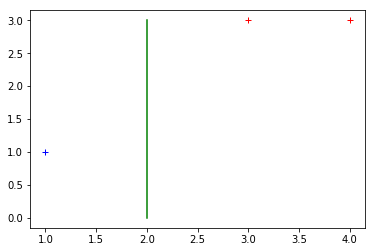

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_train[:2,0], x_train[:2, 1], 'r+')
ax.plot(x_train[2:,0], x_train[2:,1], 'b+')

x2 = np.array(range(0, 4))
x1 = np.array(-clf.intercept_ - clf.coef_[0][1] * x2) / clf.coef_[0][0]
ax.plot(x1, x2, 'g-')